# Séries Temporelles

**Problématique:**

Nous souhaitons prédire le cours de l'ETH(USD) d'une semaine à l'autre

*Quand on veut prédire ou juste analyser l’évolution d’une certaine quantité dans le temps, (Le cours de la bourse par exemple) on est très vite confronté un type de données assez particulier : Les séries temporelles.*


**L'intérêt des séries temporelles :**

L’importance des séries temporelles vient de son omniprésence. En effet, dans presque tous les domaines on les retrouve. Que ce soit en finance, en marketing, en traitement du signal, en physiques

In [1]:
!pip install pyramid-arima
!pip install pmdarima
from f_global import *
from data_clean import *
from visualisation import *
from arima import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import special
import warnings
warnings.filterwarnings("ignore")

  Using cached pyramid-arima-0.8.1.tar.gz (515 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/thor/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/ww/f8_yp6ds7ylb0jkxsxj285vc0000gp/T/pip-install-mle5207b/pyramid-arima_4e868fac670745b18e748769ddb8260c/setup.py'"'"'; __file__='"'"'/private/var/folders/ww/f8_yp6ds7ylb0jkxsxj285vc0000gp/T/pip-install-mle5207b/pyramid-arima_4e868fac670745b18e748769ddb8260c/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/ww/f8_yp6ds7ylb0jkxsxj285vc0000gp/T/pip-wheel-69yak39r
       cwd: /private/var/folders/ww/f8_yp6ds7ylb0jkxsxj285vc0000gp/T/pip-install-mle5207b/pyramid-arima_4e868fac670745b18e748769ddb8260c/
  Complete output (291 lines):
  Partial import of pyramid during the build process.
  Requirements: ['Cytho

  copying pyramid/arima/auto.py -> build/lib.macosx-10.9-x86_64-3.8/pyramid/arima
  creating build/lib.macosx-10.9-x86_64-3.8/pyramid/arima/tests
  copying pyramid/arima/tests/__init__.py -> build/lib.macosx-10.9-x86_64-3.8/pyramid/arima/tests
  copying pyramid/arima/tests/test_arima.py -> build/lib.macosx-10.9-x86_64-3.8/pyramid/arima/tests
  copying pyramid/arima/tests/test_c_arima.py -> build/lib.macosx-10.9-x86_64-3.8/pyramid/arima/tests
  copying pyramid/arima/tests/test_approx.py -> build/lib.macosx-10.9-x86_64-3.8/pyramid/arima/tests
  copying pyramid/arima/tests/test_stationarity.py -> build/lib.macosx-10.9-x86_64-3.8/pyramid/arima/tests
  running build_ext
  customize UnixCCompiler
  customize UnixCCompiler using build_ext
  building 'pyramid.__check_build._check_build' extension
  compiling C sources
  C compiler: x86_64-apple-darwin13.4.0-clang -fno-strict-aliasing -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O3 -Wall -Wstrict-prototypes -march=core2 -mtune=haswell -m

Failed to build pyramid-arima
    Running setup.py install for pyramid-arima ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/thor/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/ww/f8_yp6ds7ylb0jkxsxj285vc0000gp/T/pip-install-mle5207b/pyramid-arima_4e868fac670745b18e748769ddb8260c/setup.py'"'"'; __file__='"'"'/private/var/folders/ww/f8_yp6ds7ylb0jkxsxj285vc0000gp/T/pip-install-mle5207b/pyramid-arima_4e868fac670745b18e748769ddb8260c/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/ww/f8_yp6ds7ylb0jkxsxj285vc0000gp/T/pip-record-f9ab1gci/install-record.txt --single-version-externally-managed --compile --install-headers /Users/thor/opt/anaconda3/include/python3.8/pyramid-arima
         cwd: /private/var/folders/ww/f8_yp6ds7ylb0jkxsxj285vc

You should consider upgrading via the '/Users/thor/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/thor/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


## Préprocessing

### Récupération & analyse des données

In [2]:
df = fillna(read_copy_csv('data/ETH-USD.csv', True, 'Date'))

In [3]:
df_info(df)


        Longueur du dataset : 1979 enregistrements
        Nombre de colonnes : 6
        


,type,Echantillon,% de valeurs nulles,Nbr L dupliquées,Nbr V unique
Open,float64,"[2.40645, 2.54298, 2.50772, 2.44315, 2.31969]",0.0,4,1974
High,float64,"[2.68467, 2.60677, 2.6118099999999997, 2.53097...",0.0,4,1975
Low,float64,"[2.34203, 2.3039, 2.39892, 2.18635, 2.11631]",0.0,4,1974
Close,float64,"[2.5264900000000003, 2.49496, 2.44506, 2.30604...",0.0,4,1973
Adj Close,float64,"[2.5264900000000003, 2.49496, 2.44506, 2.30604...",0.0,4,1973
Volume,float64,"[4903850.0, 6662340.0, 3725080.0, 5847500.0, 3...",0.0,4,1975


In [4]:
df = df.drop(columns=['High','Low','Close','Adj Close', 'Volume'])

In [5]:
df.head()

,Open
Date,
2016-01-28,2.40645
2016-01-29,2.54298
2016-01-30,2.50772
2016-01-31,2.44315
2016-02-01,2.31969


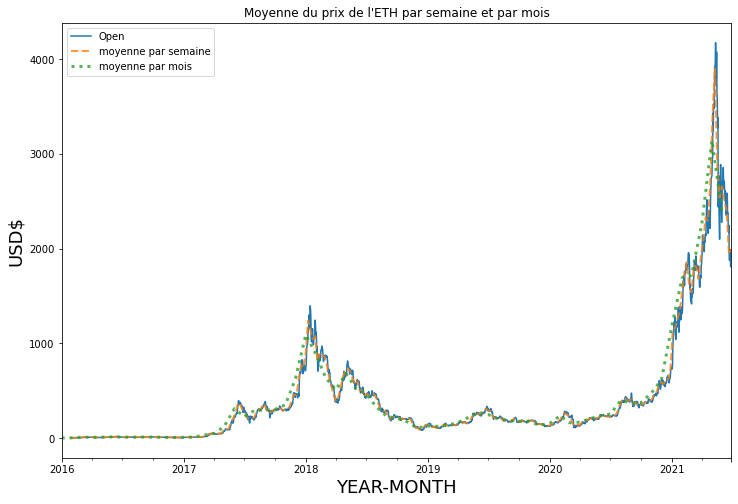

In [6]:
plot(df, '2016', '2021', 'Open', 'USD$')

### Observer les caractéristiques de la série temporelle (Stationnarité)

Un concept essentiel dans l’étude des séries temporelles est la **“stationnarité”**. 

Savoir si les observations d’une série temporelle sont générées par une structure* qui change, ou non, avec le temps.

**Méthode :**

Étudier l’évolution dans le temps de la structure de sa moyenne, de sa variance et de ses corrélations croisées avec elle-même.


**Statistiques roulantes :** 

Tracer la moyenne mobile et l’écart-type mobile. La série temporelle est stationnaire si elle reste constante dans le temps (à l’œil nu, regardez si les lignes sont droites et parallèles à l’axe des x) 

**Test de Dickey-Fuller augmenté (ADF) :** 

La série temporelle est considérée comme stationnaire si la valeur p est faible (selon l’hypothèse nulle) et si les valeurs critiques à des intervalles de confiance de 1%, 5%, 10% sont aussi proches que possible des statistiques de l’ADF (Augmented Dickey-Fuller)


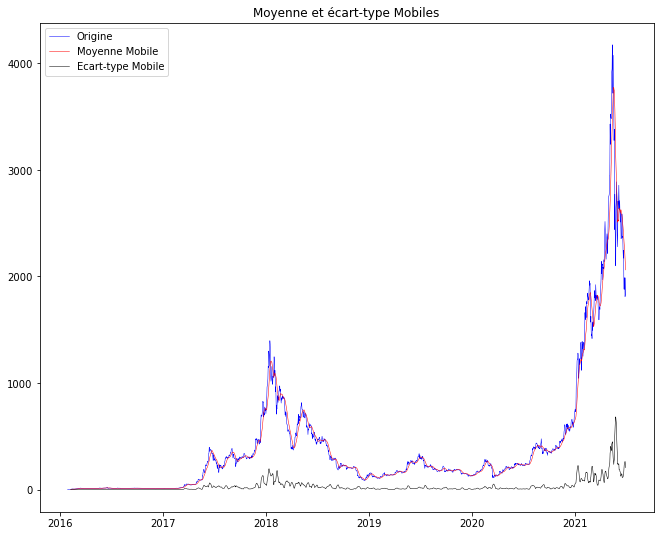

Statistiques ADF : -0.3494940749303154
p-value : 0.918196094042099
Valeurs Critiques :
	1%: -3.433704467332038
	5%: -2.8630218030562116
	10%: -2.5675588519656176


In [7]:
if_stationarity(df)

Caractéristiques d’une série temporelle : 

Y-t-il une **tendance** (trend en anglais) ? C’est-à-dire est-ce que la série temps à croître ou à décroître. 

Y a-t-il une **saisonnalité** ? Observe-t-on une sorte de répétition d’une certaine forme ?

Y a-t-il des **outliers** (Valeurs aberrantes) ? Y a-t-il de points très éloignés de la distribution ?


In [8]:
df_weeklyopen = df[['Open']].resample('W').mean()

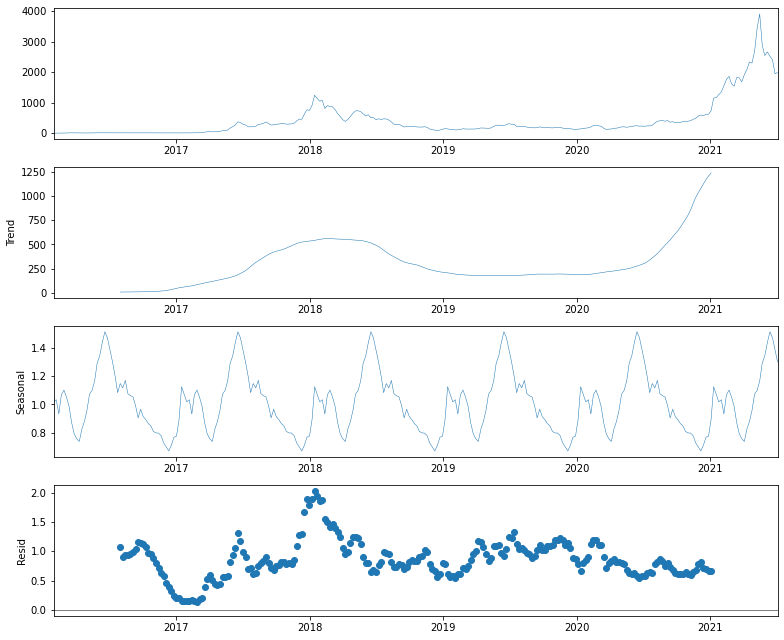

In [9]:
decomposition = seasonal_decompose(df_weeklyopen, model='multiplicative')
fig = decomposition.plot()
plt.show()

### La transformation de Cox-box (Spicy)

L'objectif est d'obtenir une distribution normale des données après transformation et une variance constante. 

In [10]:
weeklyopen_t = special.boxcox(df_weeklyopen['Open'], 0)

In [11]:
df_weekly = pd.DataFrame(weeklyopen_t)

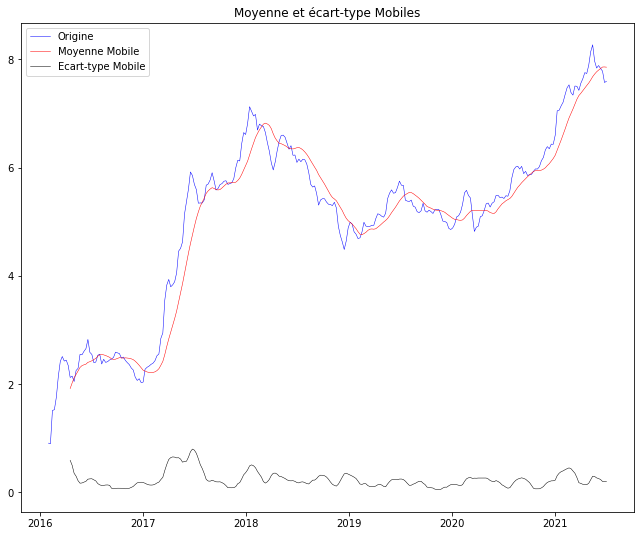

Statistiques ADF : -2.0967614804582313
p-value : 0.24581881898729924
Valeurs Critiques :
	1%: -3.4537536300652
	5%: -2.8718443180148836
	10%: -2.572260641818822


In [12]:
if_stationarity(df_weekly)

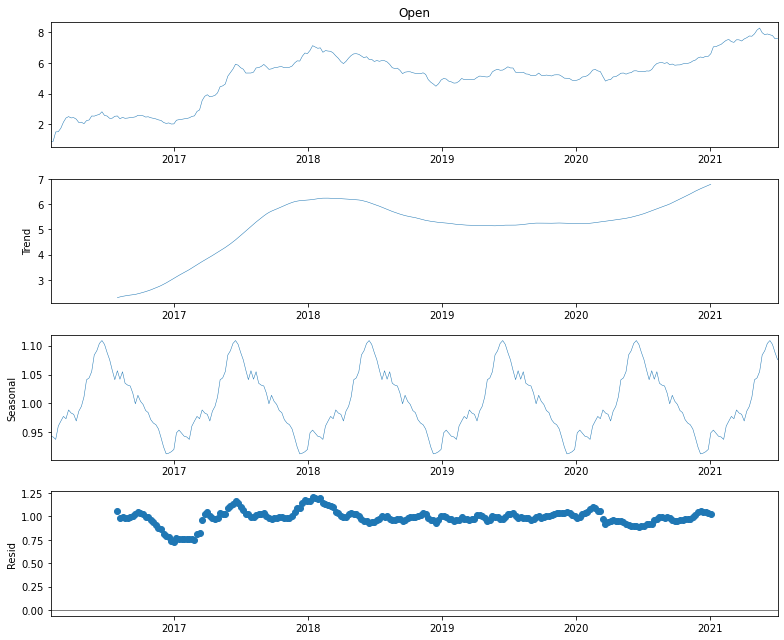

In [13]:
decomposition = seasonal_decompose(weeklyopen_t, model='multiplicative')
fig = decomposition.plot()
plt.show()

## Choix du modèle SARIMAX

SARIMAX: 

**S** - signifie saisonnalité --> paramètre s

**AR** - signifie autorégressif --> paramètre p

**I** - signifie intégré --> paramètre d

**MA** - signifie moyenne mobile --> paramètre q 

**X** - signifie Exogène --> Plus facultatif qu'un paramètre

**Paramètres de SARIMAX : (p, d, q) x (P, D, Q, s)**

p,d,q : Les mêmes que ceux d'ARIMA

P : Ordre de la partie autorégressive saisonnière

D : Ordre de la différence saisonnière

Q : Ordre de la moyenne mobile saisonnière

m : La période de la composante saisonnière



In [14]:
auto_arima(weeklyopen_t)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.44 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-173.816, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-247.849, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-198.801, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-272.103, Time=0.32 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.51 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.98 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-243.081, Time=0.23 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-271.836, Time=0.47 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-271.790, Time=0.67 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-266.508, Time=0.27 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=-269.872, Time=0.69 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=-270.162, Time=0.91 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]  

Les paramètres 𝑝, 𝑑, 𝑞, 𝑆, 𝑃, 𝐷 et 𝑄 sont déterminés par optimisation du critère d’information d’Akaike (AIC). 

Ce critère mesure le compromis entre la complexité d’un modèle et sa qualité d’ajustement.

Les scores AIC inférieurs sont meilleurs et l'AIC pénalise les modèles qui utilisent plus de paramètres

In [15]:
model_fit = fit_summary(weeklyopen_t)

                                     SARIMAX Results                                      
Dep. Variable:                               Open   No. Observations:                  284
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                 140.052
Date:                            Tue, 29 Jun 2021   AIC                           -272.103
Time:                                    08:16:31   BIC                           -257.695
Sample:                                01-31-2016   HQIC                          -266.318
                                     - 07-04-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3309      0.066      4.999      0.000       0.201       0.461
ar.S.L12      -0.5786      0.058   

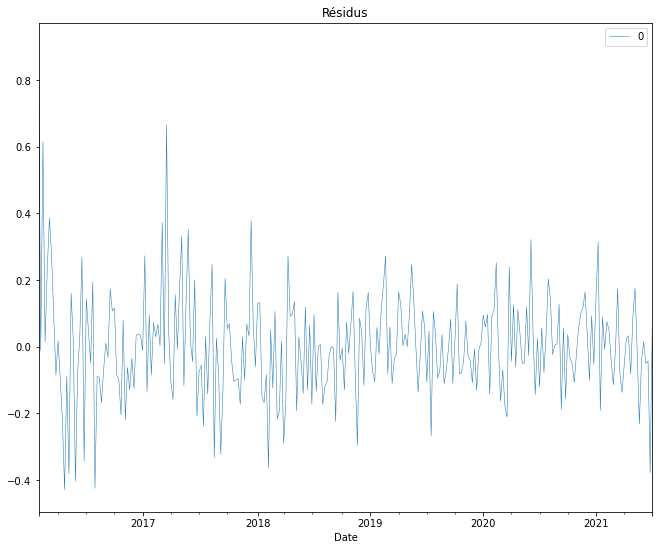

In [16]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot().set_title('Résidus');

### Prédictions avec comparaison & intervalle de confiance

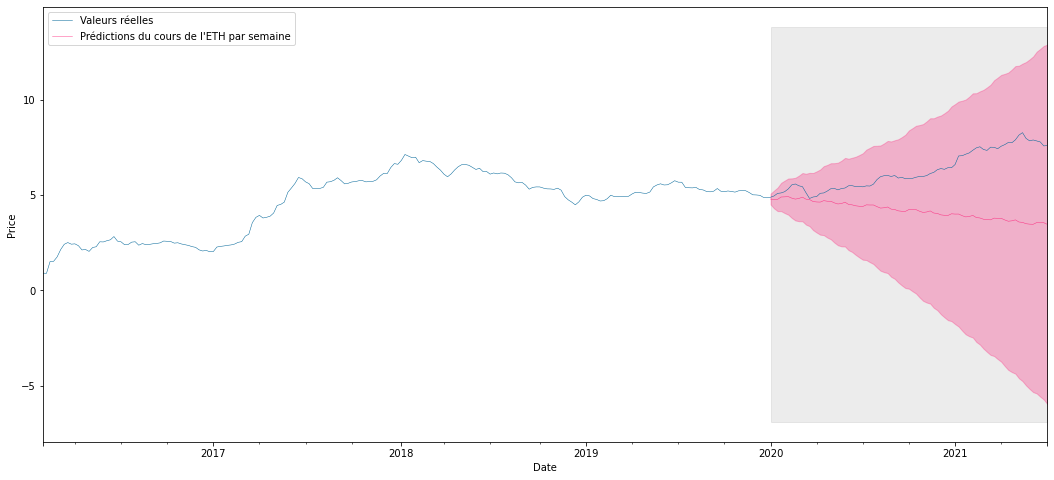

In [17]:
predict_ETH_confidence('2020-01-05', weeklyopen_t, model_fit)

### Prédictions sans comparaison & intervalle de confiance

In [18]:
pred_ci(model_fit,'2021-06-20', '2021-12-20')

In [19]:
forecast = inverse_box_cox(model_fit)

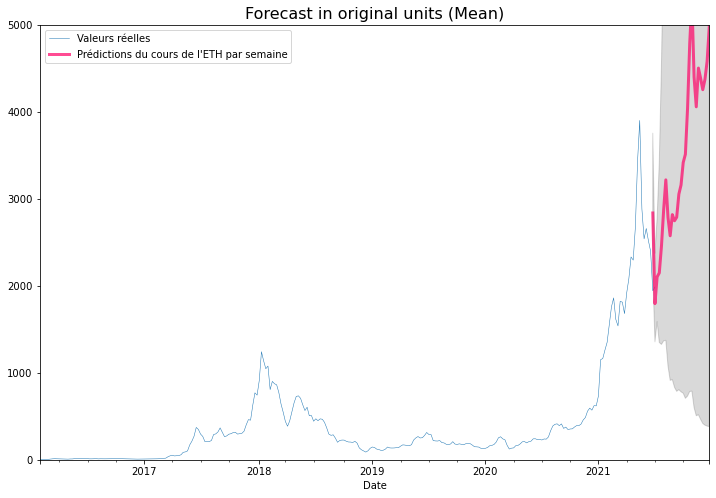

In [20]:
display_predictions(df_weeklyopen['Open'], model_fit)

In [21]:
predict_special_date(model_fit, '2021-06-27','2021-07-04')

Le cours de l'ETH du à partir du 2021-06-27 sera de 
2837.864544838181 dollars
